.ipynb_checkpoints
xitotalplus6.txt
xitotalminus1.txt
xipslist.txt
shear.txt
diff_opt_shear_plus_list.txt
ximelist.txt
vareplist.txt
xitotalplus1.txt
oplistm.txt
diff1m.txt
xipe.txt
xitotalminuslist.txt
diff_opt_shear_minus_list.txt
xitotalminus4.txt
uslistm.txt
Untitled.ipynb
ellipticity.txt
ell_shear_diff_plus.txt
GalCatalog_LOS2.fits
xitotalplus2.txt
TreeCorr
xitotalminus3.txt
diff1p.txt
xims.txt
shear_list.txt
diff2p.txt
xitotalplus10.txt
opt_shear_diff_plus.txt
eobs_list.txt
xitotalminus9.txt
diff_ell_shear_plus_list.txt
xitotalpluslist.txt
varpluslist.txt
opt_shear_diff_minus.txt
xitotalminus2.txt
cat1.ipynb
xitotalplus7.txt
varminuslist.txt
polarization.txt
uslistp.txt
ximslist.txt
xitotalminus7.txt
xitotalminus.txt
xime.txt
xitotalminus6.txt
varsmlist.txt
xitotalplus8.txt
xipelist.txt
gg.out
oplistp.txt
diff2m.txt
ell_shear_diff_minus.txt
varsplist.txt
xips.txt
xitotalminus8.txt
xitotalplus9.txt
gg2.out
xitotalplus3.txt
GalCatalog_LOS1.fits
uslistshearm.txt
xitotalplus5.txt
pol

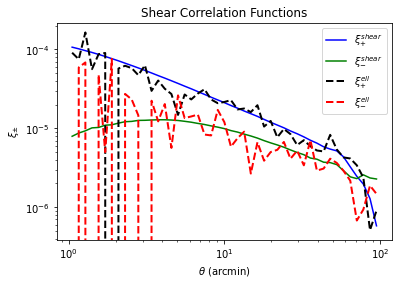

In [1]:
# In this code we calculate shear correlation functions(c.f.) using the "TreeCorr" code developed by M. Jarvis
# Our goal is to test if polarisation can carry extra information on weak lensing surveys.
# To test this assumption, we construct an optimal estimator for computing shear c.f. that includes polarisation.
# We start by computing the common shear correlation functions by using the observed ellipticity estimator
# We use the KiDS-450 Mock source catalogue provided by SLICS. This catalogue measures both observed ellipticity and shear
# Therefore, we can compute the noise-free c.f. by using the shear components as input and then compare the result to the noisy estimatro using ellipticity as input.

# We start by calculating shear c.f. using shear and ellipticity.



# Set coordinates x,y
# We use the SLICS Mock-Source KiDS-450 catalog
# First, we need to import the necessary libraries and change the working directory
from astropy.io import fits
import os
import numpy as np
import treecorr
import fitsio

# First of all, we make sure that we are working on the correct directory, where all of the data are stored 

for g in os.listdir("/home/stamou/Downloads/KiDS450_download_dir"):
    print(g)
os.chdir('/home/stamou/Downloads/KiDS450_download_dir')
os.getcwd()
catalog1=fits.open('GalCatalog_LOS1.fits')[1].data
catalog1

# We save the x and y coordinates as separate arrays and we import them as follows:

x_list=[[catalog1[i][0]] for i in range(3070801)]
y_list=[[catalog1[i][1]] for i in range(3070801)]

# We want to test the usual correlation function and the one including polarisation. 
# Thus, we will extract all the catalog's elements into different lists
# We set sp=0.25 and we use that se=0.25 for galaxies

shearfull=np.loadtxt('shear_list.txt')
eobsfull=np.loadtxt('eobs_list.txt') 
sp=0.25
se=0.25


# IMPORTANT REMARK: Polarisation, shear, ellipticity are all spin-2 quantities.


# Define the noise, as a normal distribution with dispersion sp

noise1=np.random.normal(0,sp,3070801)
noise2=np.random.normal(0,sp,3070801)

# Define the components that will enter in the TreeCorr catalogues

shear1=[shearfull[i][0] for i in range(3070801)]
shear2=[shearfull[i][1] for i in range(3070801)]
eobs1=[eobsfull[i][0] for i in range(3070801)]
eobs2=[eobsfull[i][1] for i in range(3070801)]
eint1=[eobs1[i]-shear1[i] for i in range(3070801)]
eint2=[eobs2[i]-shear2[i] for i in range(3070801)]

# We start from the noise-free estimator by using the shear components

mycat1=treecorr.Catalog(x=x_list, y=y_list, g1=shear1, g2=shear2, x_units='arcmin', y_units='arcmin')
corrf1=treecorr.GGCorrelation(min_sep=1., max_sep=100, bin_size=0.1, sep_units='arcmin')
corrf1.process(mycat1)

# Define the separation

r=np.exp(corrf1.meanlogr)

# Define the correlation functions
xips=corrf1.xip
xims=corrf1.xim

# Repeat for the usual estimator by using ellipticity components

mycat=treecorr.Catalog(x=x_list, y=y_list, g1=eobs1, g2=eobs2, x_units='arcmin', y_units='arcmin')
corrf=treecorr.GGCorrelation(min_sep=1., max_sep=100, bin_size=0.1, sep_units='arcmin')
corrf.process(mycat)
xipe=corrf.xip
xime=corrf.xim

np.savetxt('xips.txt', np.asarray(xips))
np.savetxt('xims.txt', np.asarray(xims))
np.savetxt('xipe.txt', np.asarray(xipe))
np.savetxt('xime.txt', np.asarray(xime))

# Plot the results
import matplotlib.pyplot as plt

plt.plot(r, xips, color='blue', label=r'$\xi^{shear}_{+}$')
plt.xscale('log')
plt.yscale('log', nonpositive='clip')

plt.plot(r, xims, color='green',label=r'$\xi^{shear}_{-}$')
plt.xscale('log')
plt.yscale('log', nonpositive='clip')

plt.plot(r, xipe, color='black',linestyle='dashed',lw='2', label=r'$\xi^{ell}_{+}$')
plt.xscale('log')
plt.yscale('log', nonpositive='clip')

plt.plot(r, xime, color='red',linestyle='dashed',lw='2',label=r'$\xi^{ell}_{-}$')
plt.xscale('log')
plt.yscale('log', nonpositive='clip')

plt.xlabel(r'$\theta$ (arcmin)')
plt.ylabel(r'$\xi_{\pm}$')
plt.title('Shear Correlation Functions')
plt.legend()
plt.show()



In [9]:
# We proceed in computing the optimal shear correlation function, which involves cross-correlations
# This includes polarization and it depends on the value of the parameter P
# We compute the optimal correlation function for 10 different values of P

         Reshaping from (3070801, 1) to (3070801,)
         Reshaping from (3070801, 1) to (3070801,)
         Reshaping from (3070801, 1) to (3070801,)
         Reshaping from (3070801, 1) to (3070801,)
         Reshaping from (3070801, 1) to (3070801,)
         Reshaping from (3070801, 1) to (3070801,)
         Reshaping from (3070801, 1) to (3070801,)
         Reshaping from (3070801, 1) to (3070801,)
         Reshaping from (3070801, 1) to (3070801,)
         Reshaping from (3070801, 1) to (3070801,)
         Reshaping from (3070801, 1) to (3070801,)
         Reshaping from (3070801, 1) to (3070801,)
         Reshaping from (3070801, 1) to (3070801,)
         Reshaping from (3070801, 1) to (3070801,)
         Reshaping from (3070801, 1) to (3070801,)
         Reshaping from (3070801, 1) to (3070801,)
         Reshaping from (3070801, 1) to (3070801,)
         Reshaping from (3070801, 1) to (3070801,)
         Reshaping from (3070801, 1) to (3070801,)
         Reshaping from (307080

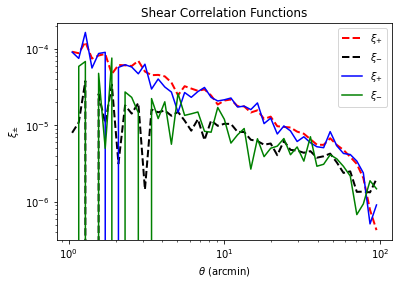

In [2]:
# We define the range of P-values and then the P-dependent components of polarisation


for P in np.linspace(0,1,11):
    def pol1(P):
        pol1=[P*eint1[i]+noise1[i] for i in range(3070801)]
        return pol1


    def pol2(P):
        pol2=[P*eint2[i]+noise2[i] for i in range(3070801)]
        return pol2

#Define the catalogue with the observed ellipticities as input and then the polarisation catalogue as a function of P
    
    cat1 = treecorr.Catalog(x=x_list, y=y_list, g1=eobs1, g2=eobs2, x_units='arcmin', y_units='arcmin')

    def cat2(P) :
        cat2= treecorr.Catalog(x=x_list, y=y_list, g1=pol1(P), g2=pol2(P), x_units='arcmin', y_units='arcmin')
        return cat2

# Define the configuration that will be used for the computation of c.f.    
    
    config = { 'x_col ' : 'x_list',

           'y_col ' : 'y_list',

           'x_units' : 'arcmin',

           'y_units' : 'arcmin',
         
           'max_sep' : '100' ,
          
           'min_sep' : '1'   ,
          
           'bin_size': '0.1' ,
          
           'sep_units' : 'arcmin' }

    gg = treecorr.GGCorrelation(config)


# Cross-correlate the two catalogues and calculate tje +,- c.f.
    
    gg.process(cat1,cat2(P))

    def xipcross(P):
        xipcross= gg.xip
        return xipcross

    def ximcross(P):
        ximcross= gg.xim
        return ximcross

    gg2 = treecorr.GGCorrelation(config)

    gg2.process(cat2(P),cat1)

    def xipcross2(P):
        xipcross2= gg2.xip
        return xipcross2

    def ximcross2(P):
        ximcross2= gg2.xim
        return ximcross2


    corrfp=treecorr.GGCorrelation(min_sep=1., max_sep=100, bin_size=0.1, sep_units='arcmin')

    corrfp.process(cat2(P))

    
# Calculate the polarisation auto-correlation    
    
    
    def xippol(P):
        xippol=corrfp.xip
        return xippol

    def ximpol(P):
        ximpol=corrfp.xim
        return ximpol

# Define the optimal c.f. by adding the ellipticity, the cross and the auto=polarisation estimators    
    
    def xitotalplus(P):
        xitotalplus=xipe-(((P*se**2)/((P**2)*(se**2)+sp**2))*(xipcross(P)+xipcross2(P)))+(((P*se**2)/((P**2)*(se**2)+sp**2))**2)*xippol(P)
        return xitotalplus

    def xitotalminus(P):
        xitotalminus=xime-(((P*se**2)/((P**2)*(se**2)+sp**2))*(ximcross(P)+ximcross2(P)))+(((P*se**2)/((P**2)*(se**2)+sp**2))**2)*ximpol(P)
        return xitotalminus

# Save the output for each value of P as a txt file 

    np.savetxt('xitotalplus1.txt', np.asarray(xitotalplus(P=0.1)))
    np.savetxt('xitotalminus1.txt', np.asarray(xitotalminus(P=0.1)))
    np.savetxt('xitotalplus2.txt', np.asarray(xitotalplus(P=0.2)))
    np.savetxt('xitotalminus2.txt', np.asarray(xitotalminus(P=0.2)))
    np.savetxt('xitotalplus3.txt', np.asarray(xitotalplus(P=0.3)))
    np.savetxt('xitotalminus3.txt', np.asarray(xitotalminus(P=0.3)))
    np.savetxt('xitotalplus4.txt', np.asarray(xitotalplus(P=0.4)))
    np.savetxt('xitotalminus4.txt', np.asarray(xitotalminus(P=0.4)))
    np.savetxt('xitotalplus5.txt', np.asarray(xitotalplus(P=0.5)))
    np.savetxt('xitotalminus5.txt', np.asarray(xitotalminus(P=0.5)))
    np.savetxt('xitotalplus6.txt', np.asarray(xitotalplus(P=0.6)))
    np.savetxt('xitotalminus6.txt', np.asarray(xitotalminus(P=0.6)))
    np.savetxt('xitotalplus7.txt', np.asarray(xitotalplus(P=0.7)))
    np.savetxt('xitotalminus7.txt', np.asarray(xitotalminus(P=0.7)))
    np.savetxt('xitotalplus8.txt', np.asarray(xitotalplus(P=0.8)))
    np.savetxt('xitotalminus8.txt', np.asarray(xitotalminus(P=0.8)))
    np.savetxt('xitotalplus9.txt', np.asarray(xitotalplus(P=0.9)))
    np.savetxt('xitotalminus9.txt', np.asarray(xitotalminus(P=0.9)))
    np.savetxt('xitotalplus10.txt', np.asarray(xitotalplus(P=1)))
    np.savetxt('xitotalminus10.txt', np.asarray(xitotalminus(P=1)))
    
    
#Plot an example for P=0.5    
    
plt.plot(r, xitotalplus(P=0.5), color='red', lw='2',linestyle='dashed', label=r'$\xi_{+}$')
plt.xscale('log')
plt.yscale('log', nonpositive='clip')

plt.plot(r, xitotalminus(P=0.5), color='black',lw='2',linestyle='dashed',label=r'$\xi_{-}$')
plt.xscale('log')
plt.yscale('log', nonpositive='clip')

plt.plot(r, xipe, color='blue', label=r'$\xi_{+}$')
plt.xscale('log')
plt.yscale('log', nonpositive='clip')

plt.plot(r, xime, color='green',label=r'$\xi_{-}$')
plt.xscale('log')
plt.yscale('log', nonpositive='clip')

plt.xlabel(r'$\theta$ (arcmin)')
plt.ylabel(r'$\xi_{\pm}$')
plt.title('Shear Correlation Functions')
plt.legend()
plt.show()



In [ ]:
# We want to test if the variance of the optimal estimator is smaller than the variance of the ellipticity estimator
# The process is presented below

In [4]:
# Load the optimal c.f. compoents for each value of P


xitotalplus1=np.loadtxt('xitotalplus1.txt')
xitotalminus1=np.loadtxt('xitotalminus1.txt')
xitotalplus2=np.loadtxt('xitotalplus2.txt')
xitotalminus2=np.loadtxt('xitotalminus2.txt')
xitotalplus3=np.loadtxt('xitotalplus3.txt')
xitotalminus3=np.loadtxt('xitotalminus3.txt')
xitotalplus4=np.loadtxt('xitotalplus4.txt')
xitotalminus4=np.loadtxt('xitotalminus4.txt')
xitotalplus5=np.loadtxt('xitotalplus5.txt')
xitotalminus5=np.loadtxt('xitotalminus5.txt')
xitotalplus6=np.loadtxt('xitotalplus6.txt')
xitotalminus6=np.loadtxt('xitotalminus6.txt')
xitotalplus7=np.loadtxt('xitotalplus7.txt')
xitotalminus7=np.loadtxt('xitotalminus7.txt')
xitotalplus8=np.loadtxt('xitotalplus8.txt')
xitotalminus8=np.loadtxt('xitotalminus8.txt')
xitotalplus9=np.loadtxt('xitotalplus9.txt')
xitotalminus9=np.loadtxt('xitotalminus9.txt')
xitotalplus10=np.loadtxt('xitotalplus10.txt')
xitotalminus10=np.loadtxt('xitotalminus10.txt')


In [5]:
# Calculate the variance of each optimal c.f.
import statistics as sts

varxip1=sts.pvariance(xitotalplus1)
varxim1=sts.pvariance(xitotalminus1)
varxip2=sts.pvariance(xitotalplus2)
varxim2=sts.pvariance(xitotalminus2)
varxip3=sts.pvariance(xitotalplus3)
varxim3=sts.pvariance(xitotalminus3)
varxip4=sts.pvariance(xitotalplus4)
varxim4=sts.pvariance(xitotalminus4)
varxip5=sts.pvariance(xitotalplus5)
varxim5=sts.pvariance(xitotalminus5)
varxip6=sts.pvariance(xitotalplus6)
varxim6=sts.pvariance(xitotalminus6)
varxip7=sts.pvariance(xitotalplus7)
varxim7=sts.pvariance(xitotalminus7)
varxip8=sts.pvariance(xitotalplus8)
varxim8=sts.pvariance(xitotalminus8)
varxip9=sts.pvariance(xitotalplus9)
varxim9=sts.pvariance(xitotalminus9)
varxip10=sts.pvariance(xitotalplus10)
varxim10=sts.pvariance(xitotalminus10)

In [6]:
# Calculate the variance of the shear and ellipticity estimators and create a list of them.

varsp=sts.pvariance(xips)
varsm=sts.pvariance(xims)
varep=sts.pvariance(xipe)
varem=sts.pvariance(xime)
varsplist=[varsp,varsp,varsp,varsp,varsp,varsp,varsp,varsp,varsp,varsp]
varsmlist=[varsm,varsm,varsm,varsm,varsm,varsm,varsm,varsm,varsm,varsm]
vareplist=[varep,varep,varep,varep,varep,varep,varep,varep,varep,varep]
varemlist=[varem,varem,varem,varem,varem,varem,varem,varem,varem,varem]
varpluslist=[varxip1,varxip2,varxip3,varxip4,varxip5,varxip6,varxip7,varxip8,varxip9,varxip10]
varminuslist=[varxim1,varxim2,varxim3,varxim4,varxim5,varxim6,varxim7,varxim8,varxim9,varxim10]
# Save the lists as a txt file
np.savetxt('varsplist.txt', np.asarray(varsplist))
np.savetxt('varsmlist.txt', np.asarray(varsmlist))
np.savetxt('vareplist.txt', np.asarray(vareplist))
np.savetxt('varemlist.txt', np.asarray(varemlist))
np.savetxt('varpluslist.txt', np.asarray(varpluslist))
np.savetxt('varminuslist.txt', np.asarray(varminuslist))

In [7]:
# Define the different values of P

P_values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

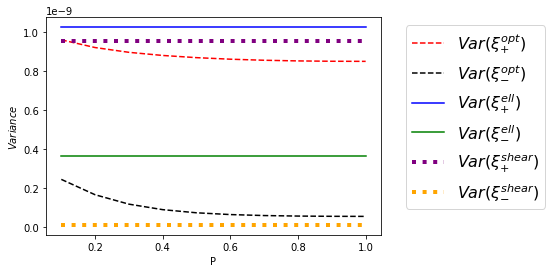

In [8]:
# Plot the variance of each one of the three estimators with respect to the P-values

plt.plot(P_values,varpluslist, color='red',linestyle='dashed',label=r'$Var(\xi^{opt}_{+})$')

plt.plot(P_values,varminuslist, color='black',linestyle='dashed',label=r'$Var(\xi^{opt}_{-})$')

plt.plot(P_values,vareplist, color='blue',label=r'$Var(\xi^{ell}_{+})$')

plt.plot(P_values,varemlist, color='green',label=r'$Var(\xi^{ell}_{-})$')

plt.plot(P_values,varsplist, color='purple',linestyle='dotted',lw='4',label=r'$Var(\xi^{shear}_{+})$')

plt.plot(P_values,varsmlist, color='orange',linestyle='dotted',lw='4',label=r'$Var(\xi^{shear}_{-})$')

plt.xlabel("P")
plt.ylabel(r'$Variance$')
plt.legend(prop={'size': 16},bbox_to_anchor=(1.05, 1))

In [9]:
# We see that the variance of the optimal estimator is smaller than the cariance of the ellipticity estimator

In [10]:
# Finally, we wish to examine the noise of each estimator.
# To do that, we calculate the variance of the difference between the optimal and the shear estimatros and the difference between the variance of the ellipticity and the shear estimators, and we divide by se to normalise.

In [15]:
# We start by defining a list the optimal estimator components for each value of P
# We also construct a list of the shear and ellipticity estimators

xitotalpluslist=[xitotalplus1,xitotalplus2,xitotalplus3,xitotalplus4,xitotalplus5,xitotalplus6,xitotalplus7,xitotalplus8,xitotalplus9,xitotalplus10]
xitotalminuslist=[xitotalminus1,xitotalminus2,xitotalminus3,xitotalminus4,xitotalminus5,xitotalminus6,xitotalminus7,xitotalminus8,xitotalminus9,xitotalminus10]
xipslist=[xips,xips,xips,xips,xips,xips,xips,xips,xips,xips]
ximslist=[xims,xims,xims,xims,xims,xims,xims,xims,xims,xims]
xipelist=[xipe,xipe,xipe,xipe,xipe,xipe,xipe,xipe,xipe,xipe]
ximelist=[xime,xime,xime,xime,xime,xime,xime,xime,xime,xime]

# Define the variance of the difference

diff_opt_shear_plus_list=[(sts.pvariance((xitotalpluslist[i]-xipslist[i])/se)) for i in range(10)]
diff_opt_shear_minus_list=[(sts.pvariance((xitotalminuslist[i]-ximslist[i])/se)) for i in range(10)]
diff_ell_shear_plus_list=[(sts.pvariance((xipelist[i]-xipslist[i])/se)) for i in range(10)]
diff_ell_shear_minus_list=[(sts.pvariance((ximelist[i]-ximslist[i])/se)) for i in range(10)]

# Save everything in a txt file

np.savetxt('xitotalpluslist.txt', np.asarray(xitotalpluslist))
np.savetxt('xitotalminuslist.txt', np.asarray(xitotalminuslist))
np.savetxt('xipslist.txt', np.asarray(xipslist))
np.savetxt('ximslist.txt', np.asarray(ximslist))
np.savetxt('xipelist.txt', np.asarray(xipelist))
np.savetxt('ximelist.txt', np.asarray(ximelist))
np.savetxt('diff_ell_shear_plus_list.txt', np.asarray(diff_ell_shear_plus_list))
np.savetxt('diff_ell_shear_minus_list.txt', np.asarray(diff_ell_shear_minus_list))
np.savetxt('diff_opt_shear_plus_list.txt', np.asarray(diff_opt_shear_plus_list))
np.savetxt('diff_opt_shear_minus_list.txt', np.asarray(diff_opt_shear_minus_list))

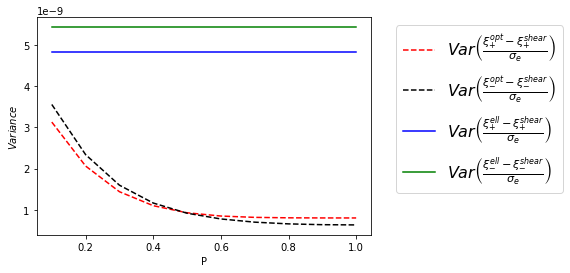

In [16]:
# Plot the results

plt.plot(P_values,diff_opt_shear_plus_list, color='red',linestyle='dashed',label=r'$Var\left(\frac{\xi^{opt}_{+}-\xi^{shear}_{+}}{\sigma_{e}}\right)$')

plt.plot(P_values,diff_opt_shear_minus_list, color='black',linestyle='dashed',label=r'$Var\left(\frac{\xi^{opt}_{-}-\xi^{shear}_{-}}{\sigma_{e}}\right)$')

plt.plot(P_values,diff_ell_shear_plus_list, color='blue',label=r'$Var\left(\frac{\xi^{ell}_{+}-\xi^{shear}_{+}}{\sigma_{e}}\right)$')

plt.plot(P_values,diff_ell_shear_minus_list, color='green',label=r'$Var\left(\frac{\xi^{ell}_{-}-\xi^{shear}_{-}}{\sigma_{e}}\right)$')


plt.xlabel("P")
plt.ylabel(r'$Variance$')
plt.legend( prop={'size': 16},bbox_to_anchor=(1.05, 1))

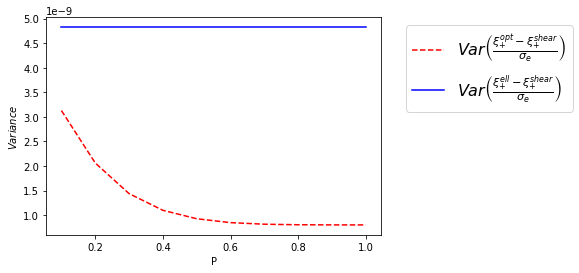

In [17]:
# Plot the plus function separately

plt.plot(P_values,diff_opt_shear_plus_list, color='red',linestyle='dashed',label=r'$Var\left(\frac{\xi^{opt}_{+}-\xi^{shear}_{+}}{\sigma_{e}}\right)$')

plt.plot(P_values,diff_ell_shear_plus_list, color='blue',label=r'$Var\left(\frac{\xi^{ell}_{+}-\xi^{shear}_{+}}{\sigma_{e}}\right)$')
plt.xlabel("P")
plt.ylabel(r'$Variance$')
plt.legend(prop={'size': 16},bbox_to_anchor=(1.05, 1))

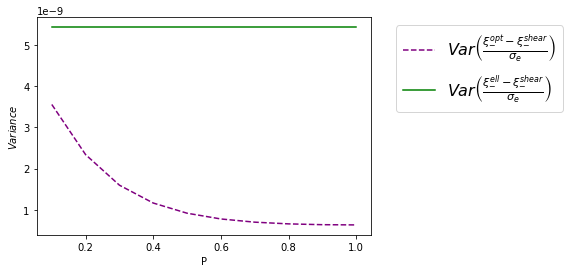

In [18]:
# Plot the minus function separately

plt.plot(P_values,diff_opt_shear_minus_list, color='purple',linestyle='dashed',label=r'$Var\left(\frac{\xi^{opt}_{-}-\xi^{shear}_{-}}{\sigma_{e}}\right)$')

plt.plot(P_values,diff_ell_shear_minus_list, color='green',label=r'$Var\left(\frac{\xi^{ell}_{-}-\xi^{shear}_{-}}{\sigma_{e}}\right)$')
plt.xlabel("P")
plt.ylabel(r'$Variance$')
plt.legend(prop={'size': 16},bbox_to_anchor=(1.05, 1))